## 문제 - 데이터 소개
- 신용카드 부정 사용자 검출

### 신용카드 부정사용 검출에 관한 논문의 한 예
- 신용카드와 같은 금융 데이터들은 구하기가 어려움
- 금융 데이터들의 데이터는 또한 다루기 쉽지 않음
- 그러나 지능화되어가는 현대 범죄에 맞춰 사전 이상 징후 검출 등 금융기관이 많은 노력을 기울이고 있음
- 이 데이터 역시 센서를 이용한 사람의 행동 과정 유추처럼 머신러닝의 이용 분야중에 하나임

### 데이터 다운로드
- https://www.kaggle.com/mlg-ulb/creditcardfraud

### 데이터 개요
- 신용카드 사기 검출 분류 실습용 데이터
- 데이터에 class라는 이름의 컬럼이 사기 유무를 의미
- class 컬럼의 불균형이 극심해서 전체 데이터의 약 0.172%가 1 (사기 Fraud)을 가짐

### 데이터 특성


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('../data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- 금융 데이터이고 기업의 기밀 보호를 위해 대다수 특성의 이름은 삭제되어 있음
- Amount: 거래금액
- Class: Fraud 여유 (1이면 Fraud)

#### 데이터의 불균형이 심함

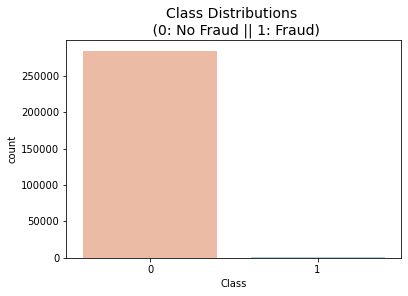

In [30]:
sns.countplot(x='Class', data=data, palette='RdBu')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', size=14)
plt.show()

In [13]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [26]:
class1_prop = round(data.Class.value_counts()[1] / len(data) * 100, 2)
print('Frauds', class1_prop, '% of the dataset')

Frauds 0.17 % of the dataset


- Fraud의 비율이 전체 데이터 대비 0.172%

#### 일단 X, y로 데이터 선정

In [31]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

#### 데이터 분리

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=13, stratify=y)

#### 나눈 데이터의 불균형 정도가 어떤 지 확인해보자

In [39]:
# train
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [40]:
tmp = np.unique(y_train, return_counts=True)[1]
print(tmp[1] / len(y_train) * 100, '%')

0.17254870488152324 %


In [41]:
# test
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([85295,   148], dtype=int64))

In [42]:
tmp = np.unique(y_test, return_counts=True)[1]
print(tmp[1] / len(y_test) * 100, '%')

0.17321489179921118 %


---

### 단순 무식한 1st Trial

#### 먼저 분류기의 성능을 return하는 함수 하나 작성

In [43]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

- 이런 식으로 함수화 해두면 나중에 따로 사용하도록 해둘 수 있다

#### 성능을 출력하는 함수 하나 작성

In [45]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('==> confusion matrix')
    print(confusion)
    print('====================')
    
    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

#### Logistic Regression

In [47]:
    %%time

    from sklearn.linear_model import LogisticRegression

    lr_clf = LogisticRegression(random_state=13, solver='liblinear')
    lr_clf.fit(X_train, y_train)
    lr_pred = lr_clf.predict(X_test)

    print_clf_eval(y_test, lr_pred)

==> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889
Recall: 0.5946, F1: 0.7126, AUC: 0.7972
Wall time: 5.51 s


#### Decision Tree

In [51]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

==> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833
Recall: 0.7162, F1: 0.7910, AUC: 0.8580
Wall time: 2.62 s


#### Random Forest

In [52]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

==> confusion matrix
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565
Recall: 0.7432, F1: 0.8365, AUC: 0.8716
Wall time: 32.9 s


#### LightGBM

In [54]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,
                         boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

==> confusion matrix
[[85289     6]
 [   34   114]]
Accuracy: 0.9995, Precision: 0.9500
Recall: 0.7703, F1: 0.8507, AUC: 0.8851
Wall time: 8.33 s


#### 여기서 Recall과 Precision의 의미는
- 은행 입장에서는 Recall이 좋을 것이다
- 사용자 입장에서는 Precision이 좋을 것이다

---

### 한걸음 전진한 1st Trial

#### 모델과 데이터를 주면 성능을 출력하는 함수를 하나 만들자

In [118]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

#### 다수의 모델의 성능을 정리해서 DataFrame으로 반환하는 함수 작성

In [119]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

#### 4개의 분류 모델을 한 번에 표로 정리해보자

In [58]:
%%time

models=[lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

Fit time:  55.45294189453125
Wall time: 55.5 s


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


- 확실히 앙상블 계열의 성능이 우수하다

---

### 데이터를 정리해서 다시 2nd Trial

#### data의 Amount 컬럼 확인

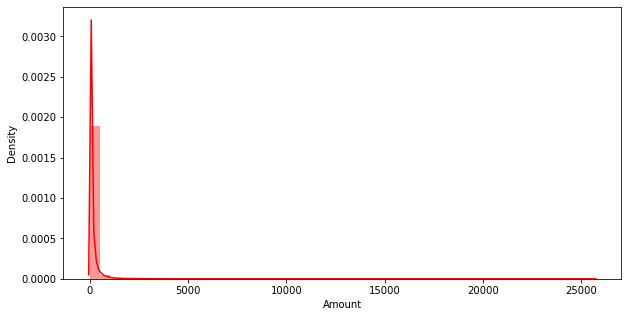

In [68]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.distplot(data['Amount'], color='r')

plt.show()

- Amount는 신용카드 사용금액
- 컬럼의 분포가 특정 대역이 아주 많다

#### Amount 컬럼에 StandardScaler 적용

In [77]:
data['Amount'].values.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

data_copy = data.iloc[:, 1:-2]
data_copy['Amount_Scaled'] = amount_n
data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


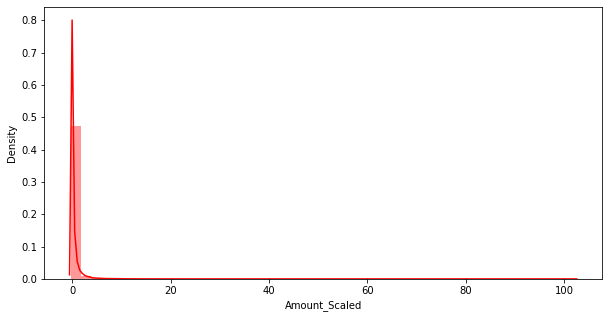

In [82]:
plt.figure(figsize=(10, 5))
sns.distplot(data_copy['Amount_Scaled'], color='r')

plt.show()

#### 데이터 재분리

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data_copy, y, test_size=0.3,
                                                   random_state=13, stratify=y)

#### 모델을 다시 평가

In [79]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time: ', time.time() - start_time)
results

Fit time:  50.717753171920776


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


#### 모델별 ROC커브

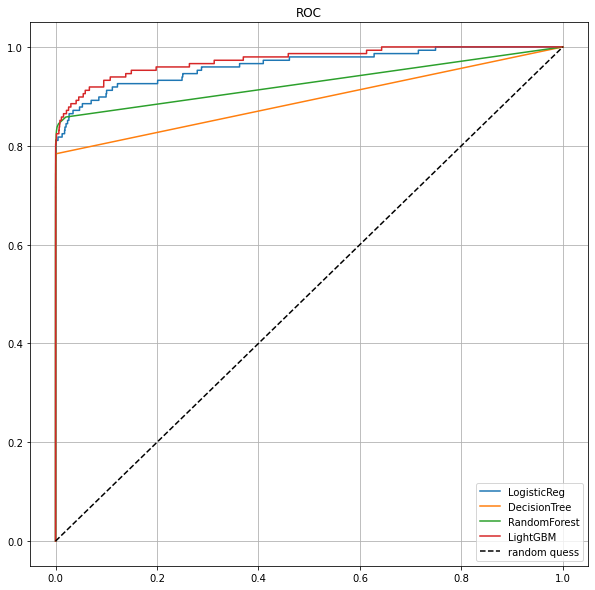

In [80]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()
    
draw_roc_curve(models, model_names, X_test, y_test)

### 또 다른 시도 log scale 2nd Trial

In [83]:
amount_log = np.log1p(data['Amount'])

data_copy['Amount_Scaled'] = amount_log
data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


#### 분포가 변화함

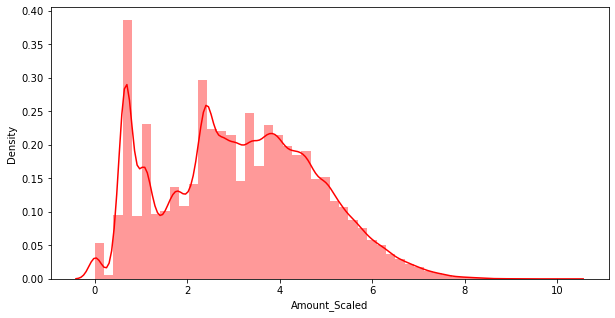

In [84]:
plt.figure(figsize=(10, 5))
sns.distplot(data_copy['Amount_Scaled'], color='r')

plt.show()

#### 다시 성능 확인

In [86]:
%%time

X_train, X_test, y_train, y_test = train_test_split(data_copy, y, test_size=0.3,
                                                   random_state=13, stratify=y)

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

Wall time: 54.9 s


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


- 미세한 변화가 보이지만 확실한 변화는 관찰되지 않는다

#### ROC 커브 결과

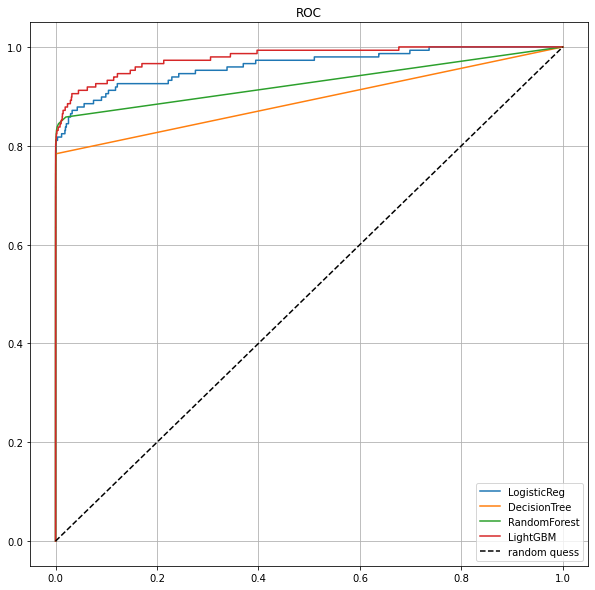

In [87]:
draw_roc_curve(models, model_names, X_test, y_test)

### 다시 데이터의 Outlier를 정리해보자 3rd Trial

#### 특이 데이터

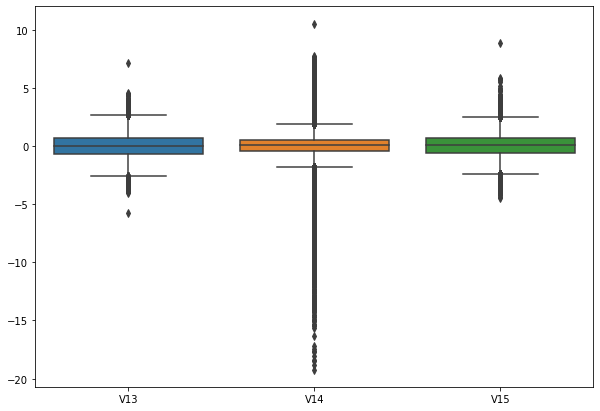

In [91]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.boxplot(data=data[['V13', 'V14', 'V15']]);

#### Outlier를 정리하기 위해 Outlier의 인덱스를 파악하는 코드

In [92]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

#### Outlier 찾기

In [94]:
get_outlier(df=data, column='V14', weight=1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

#### Outlier 제거

In [95]:
data_copy.shape

(284807, 29)

In [97]:
outlier_index = get_outlier(df=data, column='V14', weight=1.5)
data_copy.drop(outlier_index, axis=0, inplace=True)
data_copy.shape

(284803, 29)

#### Outlier를 제거하고 데이터 분리

In [98]:
X = data_copy

data.drop(outlier_index, axis=0, inplace=True)
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=13, stratify=y)

#### 모델 테스트

In [99]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

Wall time: 51.6 s


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


- 성능이 조금 좋아졌다고 볼 수도 있지만 더 봐야할 것 같다

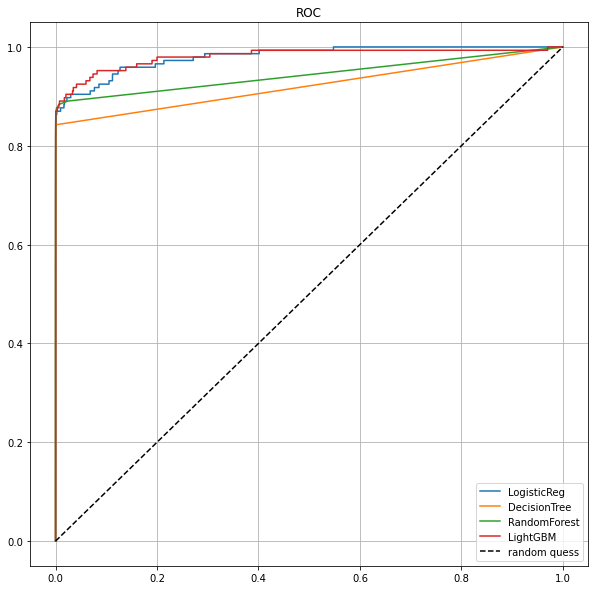

In [100]:
draw_roc_curve(models, model_names, X_test, y_test)

- ROC 커브로 보니 좋아진 것 같다

### SMOTE Oversampling 4th Trial

#### Undersampling vs Oversampling
- 데이터 불균형이 극심할 때 불균형한 두 클래스의 분포를 강제로 맞춰보는 작업
- 언더샘플링: 많은 수의 데이터를 적은 수의 데이터로 강제로 조정
- 오버샘플링:
    - 원본데이터의 피처 값들을 아주 약간 변경하여 증식
    - 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique)방법이 있음
    - 적은 데이터 세트에 있는 개별 데이터를 k-최근접이웃 방법으로 찾아서
    - 데이터의 분포 사이에 새로운 데이터를 만드는 방식
    - imbalanced-learn이라는 Python pkg가 있음

#### SMOTE 적용

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

#### 데이터 증강 효과는

In [109]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [110]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [111]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


- 원래는 라벨의 분포가 불균형했지만 oversampling이 되었다

In [120]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, 
                       X_train_over, y_train_over, X_test, y_test)

result

Wall time: 2min 32s


,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999532,0.873239,0.849315,0.861111,0.924552


- 조금 오래 걸린다
- recall의 수치가 좋아진다

#### ROC 커브

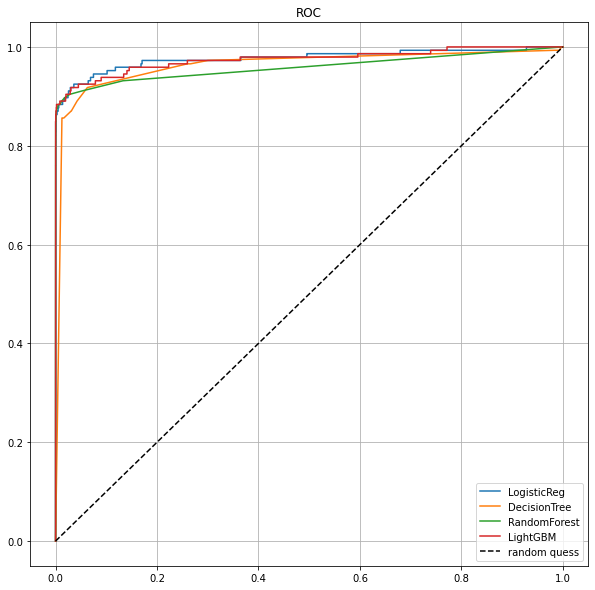

In [121]:
draw_roc_curve(models, model_names, X_test, y_test)

- 전체적인 모델들의 성능이 모두 좋아졌다